In [66]:

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, KMeans

import sys
sys.path.append('/workspaces/secure_inference/')
from research.distortion.parameters.classification.resent.resnet18_8xb16_cifar100 import Params as resnet18_8xb16_cifar100_Params
from research.clustering import clustering_utils

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SelectFromModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
layer_names = resnet18_8xb16_cifar100_Params().LAYER_NAMES
stats = {l: np.load(f'/workspaces/secure_inference/tests/26_11_multi_prototype/all_stats/drelu_per_layer/{l}.npy') for l in layer_names}

In [9]:
with open('/workspaces/secure_inference/tests/distortion_extraction_22_11_512/block_spec/0.08.pickle', 'rb') as f:
    knapsack = pkl.load(f)

In [ ]:
data = stats['layer1_0_1'][:, 0:1]
affinity_mat = clustering_utils.get_affinity_mat(data)
clusters = AffinityPropagation(affinity='precomputed').fit(affinity_mat)

In [121]:
labels = clusters.labels_.copy()
labels

array([ 0,  0,  0, ..., 64, 64, 64])

aaaaaaa


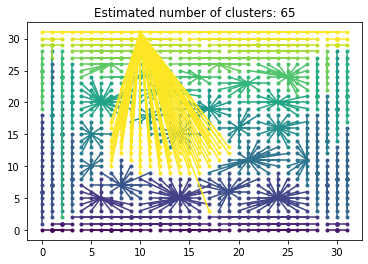

In [ ]:
%autoreload 2
clustering_utils.plot_clustering(clusters, 32, 32)

In [111]:
clusters.cluster_centers_indices_[clusters.labels_[y_index]]
# clusters.labels_[y_index]

1002

In [120]:
examples = data[:-1]
examples = examples.reshape(examples.shape[0], -1)
features = examples[:, clusters.cluster_centers_indices_]
y_index = np.ravel_multi_index((27, 30), (32, 32))
# y_index = np.ravel_multi_index((11, 11), (32, 32))
y = examples[:, y_index]
classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
classifier.fit(features, y)

top_features = np.argsort(classifier.feature_importances_)[-8:][::-1]
print(classifier.feature_importances_[top_features])
print(top_features)
print(np.stack(np.unravel_index(clusters.cluster_centers_indices_[top_features], (32, 32))))
print(classifier.score(features, y))

[0.68871249 0.19155557 0.04617725 0.03387515 0.02509029 0.00734193
 0.00724733 0.        ]
[35 52 51 59 50 24 21 64]
[[19 27 27 29 26 11  8 31]
 [30 21  8 30 29 21 31 10]]
0.9638318670576735


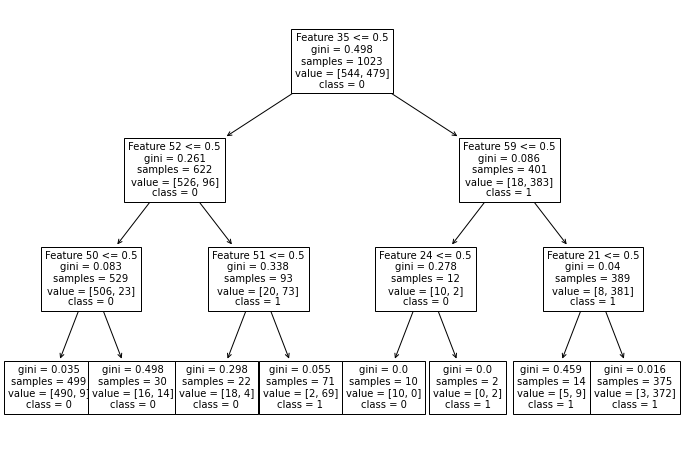

In [108]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(classifier, fontsize=10,
              feature_names=[f"Feature {i}" for i in range(features.shape[1])],  # Feature names
    class_names=["0", "1"],  # Target class names)
)
plt.show()

In [ ]:
new_labels = []
for i in range(len(labels)):
    features = examples[:, clusters.cluster_centers_indices_]
    y = examples[:, i]
    classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
    classifier.fit(features, y)
    new_labels.append(np.argmax(classifier.feature_importances_))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

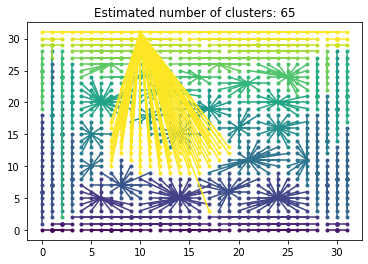

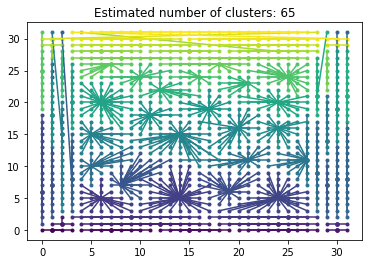

In [127]:
new_labels = np.array(new_labels)
%autoreload 2
clustering_utils.plot_clustering(clusters, 32, 32, labels=labels)
clustering_utils.plot_clustering(clusters, 32, 32, labels=new_labels)

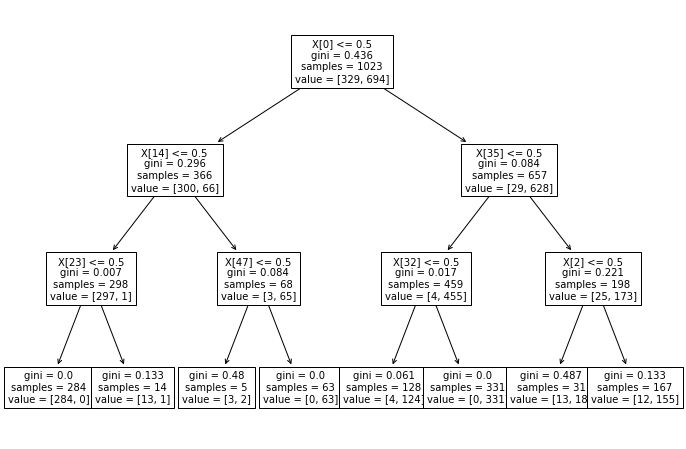

In [72]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(classifier, fontsize=10)
plt.show()

In [133]:

import numpy as np

# Example inputs
np.random.seed(42)
m, n = 1000, 4  # 3 examples, 4 binary features
features = np.random.randint(0, 2, size=(m, n))
results = np.random.randint(0, 2, size=m)

# Generate all possible combinations of feature values
truth_table = np.array(np.meshgrid(*[[0, 1]] * n)).T.reshape(-1, n)

# Compute a mask for each row in the truth table
masks = (features[:, None, :] == truth_table).all(axis=2)

# Compute the average result for each combination
average_results = masks.T @ results / masks.sum(axis=0)

# Combine the truth table with the average results
truth_table_with_results = np.hstack([truth_table, average_results[:, None]])

print(truth_table_with_results)

[[0.         0.         0.         0.         0.44642857]
 [0.         1.         0.         0.         0.41891892]
 [1.         0.         0.         0.         0.5       ]
 [1.         1.         0.         0.         0.58823529]
 [0.         0.         1.         0.         0.546875  ]
 [0.         1.         1.         0.         0.45070423]
 [1.         0.         1.         0.         0.41269841]
 [1.         1.         1.         0.         0.43243243]
 [0.         0.         0.         1.         0.5862069 ]
 [0.         1.         0.         1.         0.44067797]
 [1.         0.         0.         1.         0.61538462]
 [1.         1.         0.         1.         0.47540984]
 [0.         0.         1.         1.         0.40983607]
 [0.         1.         1.         1.         0.51470588]
 [1.         0.         1.         1.         0.5       ]
 [1.         1.         1.         1.         0.55      ]]


In [307]:
def get_features_single_neuron(target, features, depth, feature_amount):
    classifier = DecisionTreeClassifier(random_state=42, max_depth=depth)
    classifier.fit(features, target)
    top_features = np.argsort(classifier.feature_importances_)[-feature_amount:][::-1]
    return top_features, classifier.feature_importances_[top_features]

def get_all_features(examples, cluster_centers_indices, depth, feature_amount):
    chosen_features, features_importance = [], []
    features = examples[:, cluster_centers_indices]
    for neuron_idx in range(examples.shape[1]):
        cur_features_indices, cur_feature_importances = get_features_single_neuron(
            target=examples[:, neuron_idx], features=features, depth=depth, feature_amount=feature_amount
            )
        cur_features = cluster_centers_indices[cur_features_indices]
        chosen_features.append(cur_features)
        features_importance.append(cur_feature_importances)
    chosen_features = np.array(chosen_features)
    features_importance = np.array(features_importance)
    return chosen_features, features_importance


chosen_features, features_importance = get_all_features(examples, clusters.cluster_centers_indices_, 3, 1)

In [308]:
feature_amount = 1
examples_features = examples[:, chosen_features].astype(np.uint8)
my_truth_table = np.unpackbits(np.arange(2**feature_amount)[:, None].astype(np.uint8), axis=1)[:, -feature_amount:]
print(examples_features.shape)
print(my_truth_table.shape)
masks = np.all(examples_features[..., None, :] == my_truth_table[None, None, ...], axis=-1)
print(masks.shape)

(1023, 1024, 1)
(2, 1)
(1023, 1024, 2)


In [309]:
t = np.einsum('ab,abc->bc', examples.astype(int), masks.astype(int))
f = np.einsum('ab,abc->bc', 1 - examples.astype(int), masks.astype(int))

both = np.stack([t, f], axis=1)
acc = (both.max(axis=1) / (both.sum(axis=1) + 1e-9))
ratios = both.sum(axis=1) / both.shape[0]
acc_final = np.einsum('ab,ab->a', acc, ratios)
acc_final.mean()

0.9484930038435233

In [320]:
np.unique(np.all(both.argmax(axis=1) == [1, 1], axis=-1), return_counts=True)

(array([False,  True]), array([925,  99]))

In [ ]:
0.9583482742249194
0.962367057787485


In [271]:
from sympy.logic.boolalg import truth_table, And, Or, Not
from sympy import symbols

def simplify_truth_table(truth_vals, vars_list):
    # Create symbols for each variable (for n variables)
    variables = symbols(vars_list)

    # Generate the Boolean expression for Sum of Products (SOP)
    expr = Or(*[And(*[var if val else Not(var) for var, val in zip(variables, row[:-1])]) 
                for row in truth_vals if row[-1]])

    # Simplify the Boolean expression
    simplified_expr = expr.simplify()
    
    return simplified_expr


In [275]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
print(examples.shape)
print(chosen_features.shape)
res = np.take_along_axis(examples, chosen_features.T, axis=1)
res.shape

(1023, 1024)
(1024, 4)


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (1023,1) (4,1024) 

In [294]:
pred = both.argmax(axis=1)
print(pred[0].shape)
print(my_truth_table.shape)
tt = np.concatenate([my_truth_table, pred[300][..., None]], axis=-1)
var_list = np.arange(4)

simple = simplify_truth_table(tt, ['A', 'B', 'C', 'D'])
simple

(8,)
(8, 3)


~A | (~B & ~C)

In [281]:
simple.args

(~A | ~B, ~A | ~C, ~A | ~D, ~C | ~D)

In [197]:
a = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]])
b = np.array([[1, 3], [1, 2], [3, 0], [3, 1]])
res = a[:, b]
res.shape

(3, 4, 2)

In [200]:
res[1, 1]

array([6, 7])

In [202]:
examples[:, chosen_features].shape

(1023, 1024, 4)

In [189]:
examples[np.arange(examples.shape[0])[:, None], chosen_features]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (1023,1) (1024,4) 

In [186]:
print(examples.shape)
print(chosen_features.shape)
res = np.take_along_axis(examples, chosen_features.T, axis=1)
res.shape

(1023, 1024)
(1024, 4)


IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (1023,1) (4,1024) 

In [152]:
import numpy as np

# Example inputs
np.random.seed(42)
m, n = 10000000, 4  # 3 examples, 4 binary features
features = np.random.randint(0, 2, size=(m, n))
results = np.random.randint(0, 2, size=m)

# Generate all possible combinations of feature values
truth_table = np.array(np.meshgrid(*[[0, 1]] * n)).T.reshape(-1, n)

# Compute a mask for each row in the truth table
masks = (features[:, None, :] == truth_table).all(axis=2)

# Count True values for each possible combination in the result
true_counts = (masks.T @ results)  # Sum of True values (matches result 1)

# False values are the rest of the rows where the result is 0
false_counts = (masks.T @ (1 - results))

# Combine the counts into a single result with two columns (True/False counts)
truth_table_with_counts = np.hstack([true_counts[:, None], false_counts[:, None]])

print(truth_table_with_counts)

[[312177 312640]
 [311418 312657]
 [312316 311246]
 [313370 312708]
 [313911 312678]
 [311878 312433]
 [312677 312918]
 [312949 311778]
 [312997 313074]
 [312412 312450]
 [311832 313359]
 [311715 313201]
 [312437 312616]
 [311759 311255]
 [312591 312867]
 [312904 312777]]


In [148]:
truth_table_with_counts.sum()

1000